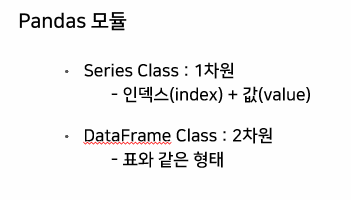

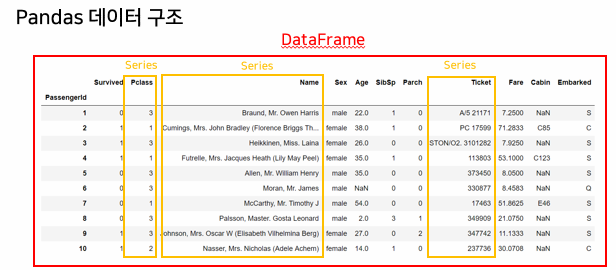

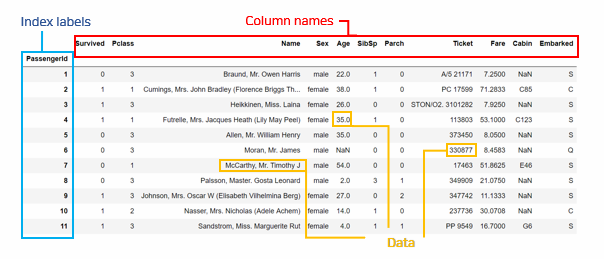

In [1]:
# pandas 사용하기
import pandas as pd

## Series

In [2]:
# Series 클래스 생성
population = pd.Series([9904312, 3448737, 2890451, 2466052])

In [3]:
population

0    9904312
1    3448737
2    2890451
3    2466052
dtype: int64

In [4]:
# 인덱스 지정하여 생성하기
population = pd.Series([9904312, 3448737, 2890451, 2466052], index = ['서울','부산','인천','대구'])

In [6]:
# 값 확인하기
population.values

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

In [7]:
# 인덱스 확인하기
population.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [8]:
# 타입 확인
population.dtype

dtype('int64')

In [10]:
# 시리즈 이름 정하기
population.name = "인구"
population.index.name = "도시"

In [11]:
population

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [12]:
#Series 연산
population/1000000

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

In [13]:
# Series 인덱싱
population['부산'], population[1]

(3448737, 3448737)

In [15]:
population[[1,0,3]]

도시
부산    3448737
서울    9904312
대구    2466052
Name: 인구, dtype: int64

In [17]:
population[population>5000000]

도시
서울    9904312
Name: 인구, dtype: int64

In [18]:
# boolean 색인
population[[True, False, True, False]]

도시
서울    9904312
인천    2890451
Name: 인구, dtype: int64

In [21]:
# Series 슬라이싱
# 숫자로 슬라이싱 할 때는 마지막 번호를 포함하지 않지만, 문자로 슬라이싱 할 때는 마지막 문자를 포함해서 결과값을 알려준다.

population[1:3]
population['부산':'인천']

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [25]:
# Series 클래스 생성 -> 딕셔너리 이용
data = {'서울':9631482, '부산':3393191, '인천':2632035,'대전':1490158}
population2 = pd.Series(data)
population2.name = '인구'
population2.index.name = '도시'

In [26]:
population2

도시
서울    9631482
부산    3393191
인천    2632035
대전    1490158
Name: 인구, dtype: int64

In [27]:
# 2015년도와 2010년도의 인구 증가를 계산
ds = population - population2
ds

도시
대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
Name: 인구, dtype: float64

In [29]:
ds[ds.notnull()]

도시
부산     55546.0
서울    272830.0
인천    258416.0
Name: 인구, dtype: float64

In [31]:
ds[ds.isnull()]

도시
대구   NaN
대전   NaN
Name: 인구, dtype: float64

In [33]:
ds = ds/population2*100
ds[ds.notnull()]

도시
부산    1.636984
서울    2.832690
인천    9.818107
Name: 인구, dtype: float64

In [37]:
# 데이터 갱신
ds['부산'] = 1.6
# 데이터 추가
ds['광주'] = 1.41
# 데이터 삭제
del ds['대구']
ds

도시
대전         NaN
부산    1.600000
서울    2.832690
인천    9.818107
광주    1.410000
Name: 인구, dtype: float64

In [36]:
ds

도시
대구         NaN
대전         NaN
부산    1.600000
서울    2.832690
인천    9.818107
광주    1.410000
Name: 인구, dtype: float64

## DataFrame

In [39]:
data = { "2015": [9904312, 3448737, 2890451, 2466052],"2010": [9631482, 3393191, 2632035, 2431774]}
df = pd.DataFrame(data, index=['서울','부산','인천','대구'])
df

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [123]:
data = { "2015": [9904312, 3448737, 2890451, 2466052],"2010": [9631482, 3393191, 2632035, 2431774]}
df = pd.DataFrame(data)
df.index=['서울','부산','인천','대구']
df

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [44]:
data = [[9904312, 3448737, 2890451, 2466052], [9631482, 3393191, 2632035, 2431774]]
df2 = pd.DataFrame(data)
df2.index = ['2015','2010']
df2.columns = ['서울','부산','인천','대구']
df2

,서울,부산,인천,대구
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774


In [58]:
df2 = df2.T

In [59]:
df2

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [64]:
# 값 확인
print(df.values)
# 인덱스 확인
print(df.index)
# 컬럼 확인
print(df.columns)

[[9904312 9631482]
 [3448737 3393191]
 [2890451 2632035]
 [2466052 2431774]]
Index(['서울', '부산', '인천', '대구'], dtype='object')
Index(['2015', '2010'], dtype='object')


In [67]:
# 열 인덱싱
df[['2015']]

,2015
서울,9904312
부산,3448737
인천,2890451
대구,2466052


In [70]:
df[['2010', '2015', '2010', '2015']]
# df[0] -> 불가능

,2010,2015,2010,2015
서울,9631482,9904312,9631482,9904312
부산,3393191,3448737,3393191,3448737
인천,2632035,2890451,2632035,2890451
대구,2431774,2466052,2431774,2466052


In [122]:
# 행 인덱싱 -> 슬라이싱으로 가져와야 한다.
df[['2015'][:1]]

,2015
서울,9904312


### loc[], iloc[] 인덱서
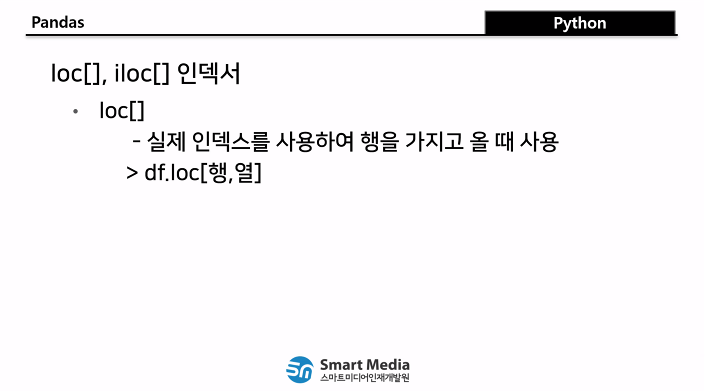

In [119]:
df.loc['서울':'부산','2015':'2015']

,2015
서울,9904312


In [124]:
df.iloc[:3, :1]

,2015
서울,9904312
부산,3448737
인천,2890451


In [128]:
# boolean 색인
b = df['2015']>=2500000
df[b]
df.loc[b,'2015':'2010']

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035


In [4]:
# csc 파일 불러오기
population_number = pd.read_csv('population_number.csv', encoding='euc-kr', index_col=0)

In [5]:
population_number

,지역,2015,2010,2005,2000
도시,,,,,
서울,수도권,9904312,9631482.0,9762546.0,9853972
부산,경상권,3448737,NaN,NaN,3655437
인천,수도권,2890451,2632035.0,NaN,2466338
대구,경상권,2466052,2431774.0,2456016.0,2473990


In [9]:
# 정렬 -> 오름차순 정렬
population_number['2010'].sort_values()

# 내림차순
population_number['2010'].sort_values(ascending=False)

도시
서울    9631482.0
인천    2632035.0
대구    2431774.0
부산          NaN
Name: 2010, dtype: float64

In [12]:
population_number.sort_values(by='2010')

,지역,2015,2010,2005,2000
도시,,,,,
대구,경상권,2466052,2431774.0,2456016.0,2473990
인천,수도권,2890451,2632035.0,NaN,2466338
서울,수도권,9904312,9631482.0,9762546.0,9853972
부산,경상권,3448737,NaN,NaN,3655437


In [13]:
population_number.sort_values(by=['지역', '2010'])

,지역,2015,2010,2005,2000
도시,,,,,
대구,경상권,2466052,2431774.0,2456016.0,2473990
부산,경상권,3448737,NaN,NaN,3655437
인천,수도권,2890451,2632035.0,NaN,2466338
서울,수도권,9904312,9631482.0,9762546.0,9853972


In [14]:
# 데이터량
population_number.count()

지역      4
2015    4
2010    3
2005    2
2000    4
dtype: int64

In [17]:
# 결측치 확인
population_number.isnull().sum()
# count는 false도 포함해서 센다.

지역      0
2015    0
2010    1
2005    2
2000    0
dtype: int64

In [26]:
s = pd.Series([1,1,2,3,4,2,3,3,3,6,7,8,8,9,9,9,9,9,7])
s.value_counts()

9    5
3    4
1    2
2    2
7    2
8    2
4    1
6    1
dtype: int64

In [3]:
# 카테고리
ages = [1, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 99]
bins = [0, 15, 25, 35, 60, 99]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
cats = pd.cut(ages, bins, labels=labels)

In [4]:
cats

['미성년자', '미성년자', '미성년자', '청년', '청년', ..., '노년', '청년', '장년', '중년', '노년']
Length: 12
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

In [5]:
ageArr = pd.DataFrame(ages, columns=['ages'])

In [6]:
ageArr

,ages
0,1
1,2
2,10
3,21
4,23
5,37
6,31
7,61
8,20
9,41


In [7]:
# ages 데이터 프레임에 cats컬럼 추가
ageArr['cats'] = cats

In [8]:
ageArr

,ages,cats
0,1,미성년자
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,장년
6,31,중년
7,61,노년
8,20,청년
9,41,장년


In [9]:
ageArr['cats'].value_counts()

미성년자    3
청년      3
중년      2
장년      2
노년      2
Name: cats, dtype: int64

In [10]:
ageArr.T

,0,1,2,3,4,5,6,7,8,9,10,11
ages,1,2,10,21,23,37,31,61,20,41,32,99
cats,미성년자,미성년자,미성년자,청년,청년,장년,중년,노년,청년,장년,중년,노년


## score

In [12]:
score = pd.read_csv('score.csv', encoding='euc-kr', index_col='과목')

In [13]:
score

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [14]:
# 합계 구하기 -> 기본
score.sum()

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [22]:
score.sum(axis=1)

과목
수학    201
영어    282
국어    253
사회    298
과학    163
dtype: int64

In [37]:
score['합계'] = score.sum(axis=1)

SyntaxError: invalid syntax (<ipython-input-37-6b4d1b0a488c>, line 1)

In [55]:
score['합계'] = score.loc[:,:'4반'].sum(axis=1)

In [56]:
score

,1반,2반,3반,4반,합계
과목,,,,,
수학,45,44,73,39,201
영어,76,92,45,69,282
국어,47,92,45,69,253
사회,92,81,85,40,298
과학,11,79,47,26,163


In [57]:
score.mean()

1반     54.2
2반     77.6
3반     59.0
4반     48.6
합계    239.4
dtype: float64

In [65]:
score.loc[:,:'4반'].mean(axis=1)

과목
수학    50.25
영어    70.50
국어    63.25
사회    74.50
과학    40.75
dtype: float64

In [63]:
score['평균'] = score.loc[:,:'4반'].mean(axis=1)

In [64]:
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45,44,73,39,201,50.25
영어,76,92,45,69,282,70.50
국어,47,92,45,69,253,63.25
사회,92,81,85,40,298,74.50
과학,11,79,47,26,163,40.75


In [68]:
score.loc['반평균'] = score.loc[:,:'4반'].mean()

In [69]:
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,50.25
영어,76.0,92.0,45.0,69.0,282.0,70.50
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,NaN,NaN


In [72]:
# 결측치 채우기(inplace : 원본 데이터에 반영)
score['합계'].fillna(value = 0, inplace = True)

In [73]:
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,50.25
영어,76.0,92.0,45.0,69.0,282.0,70.50
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,0.0,NaN


In [75]:
score.fillna(value = 0, inplace = True)
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,50.25
영어,76.0,92.0,45.0,69.0,282.0,70.50
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,0.0,0.00


In [77]:
# 큰값
score.max()

1반     92.0
2반     92.0
3반     85.0
4반     69.0
합계    298.0
평균     74.5
dtype: float64

In [79]:
# 과목 별 가장 큰 값
score.max(axis=1)

과목
수학     201.0
영어     282.0
국어     253.0
사회     298.0
과학     163.0
반평균     77.6
dtype: float64

In [80]:
#작은 값 찾기
score.min()

1반    11.0
2반    44.0
3반    45.0
4반    26.0
합계     0.0
평균     0.0
dtype: float64

In [81]:
score.min(axis=1)

과목
수학     39.0
영어     45.0
국어     45.0
사회     40.0
과학     11.0
반평균     0.0
dtype: float64

In [82]:
score.drop('영어')

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,50.25
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,0.0,0.00


In [84]:
score.drop('평균', axis = 1)

,1반,2반,3반,4반,합계
과목,,,,,
수학,45.0,44.0,73.0,39.0,201.0
영어,76.0,92.0,45.0,69.0,282.0
국어,47.0,92.0,45.0,69.0,253.0
사회,92.0,81.0,85.0,40.0,298.0
과학,11.0,79.0,47.0,26.0,163.0
반평균,54.2,77.6,59.0,48.6,0.0


In [ ]:
# Serias 클래스 또는 데이터 프레임을 병합할 수 있는 함수
# concat

In [85]:
s1 = pd.Series([275,260,250], index = ['유재석','신동엽','강호동'])
s1.name = '발사이즈'
s1

유재석    275
신동엽    260
강호동    250
Name: 발사이즈, dtype: int64

In [86]:
s2 = pd.Series([250,245], index = ['송은이','김숙'])
s2.name = '발사이즈'
s2

송은이    250
김숙     245
Name: 발사이즈, dtype: int64

In [88]:
pd.concat?

In [90]:
s3 = pd.concat([s1,s2])
s3

유재석    275
신동엽    260
강호동    250
송은이    250
김숙     245
Name: 발사이즈, dtype: int64

In [92]:
s4 = pd.Series([0.2,1.8,1.5], index = ['유재석','신동엽','강호동'])
s4.name = '시력'
s4

유재석    0.2
신동엽    1.8
강호동    1.5
Name: 시력, dtype: float64

In [98]:
s5 = pd.concat([s1,s4], axis = 1)
s5

,발사이즈,시력
유재석,275,0.2
신동엽,260,1.8
강호동,250,1.5


In [105]:
pd.concat([s3,s4],axis=1)

,발사이즈,시력
유재석,275,0.2
신동엽,260,1.8
강호동,250,1.5
송은이,250,NaN
김숙,245,NaN
